파이썬에서 다중 회귀분석을 수행하는 방법은 다양합니다. 여러 가지 라이브러리를 사용하여 회귀분석을 수행할 수 있습니다. 여기서는 scikit-learn 라이브러리를 사용하는 예시를 설명하겠습니다.

scikit-learn은 파이썬에서 머신러닝과 데이터 분석을 위한 툴킷으로 널리 사용되는 라이브러리입니다. 다중 회귀분석을 수행하기 위해 scikit-learn의 선형 회귀 모델을 사용할 수 있습니다.

먼저, 필요한 라이브러리를 import합니다.

```python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
```

그런 다음, 입력 변수(X)와 타깃 변수(y)를 정의합니다. X는 예측에 사용할 다중 변수들로 이루어진 특성 행렬이며, y는 예측하고자 하는 종속 변수입니다. 이후, 데이터를 학습 데이터와 테스트 데이터로 분할하기 위해 train_test_split 함수를 사용합니다.

```python
X = ...  # 다중 변수들로 이루어진 특성 행렬
y = ...  # 예측하고자 하는 종속 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

이제 LinearRegression 모델을 초기화하고, 학습 데이터에 대해 fit 메서드를 호출하여 모델을 학습시킵니다.

```python
model = LinearRegression()
model.fit(X_train, y_train)
```

모델을 학습시킨 후에는 테스트 데이터를 사용하여 예측을 수행할 수 있습니다.

```python
y_pred = model.predict(X_test)
```

예측 결과와 실제값 간의 오차를 평가하기 위해 평균 제곱근 오차(Root Mean Squared Error, RMSE) 등의 평가 지표를 사용할 수 있습니다. scikit-learn에서 제공하는 mean_squared_error 함수를 사용하여 RMSE를 계산할 수 있습니다.

```python
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
```

이렇게하면 파이썬에서 다중 회귀분석을 수행할 수 있습니다. 데이터 전처리, 특성 선택, 교차 검증 등 추가적인 단계가 필요할 수 있으니 상황에 맞게 적용해보세요.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, 

In [50]:
data = pd.read_csv('C:/half-time-analyze/win-nonwin/res/soccer_half.csv', header = 0, engine = 'python')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   homeAway                  530 non-null    int64  
 1   Ball_Possession_1st_Half  530 non-null    float64
 2   Corners_1st_Half          530 non-null    float64
 3   Fouls_Commited_1st_Half   530 non-null    float64
 4   Goals_1st_Half            530 non-null    float64
 5   Red_Cards_1st_Half        530 non-null    float64
 6   Shots_On_1st_Half         530 non-null    float64
 7   Yellow_Cards_1st_Half     530 non-null    float64
 8   Result                    530 non-null    int64  
 9   Shots_1st_Half            530 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 41.5 KB


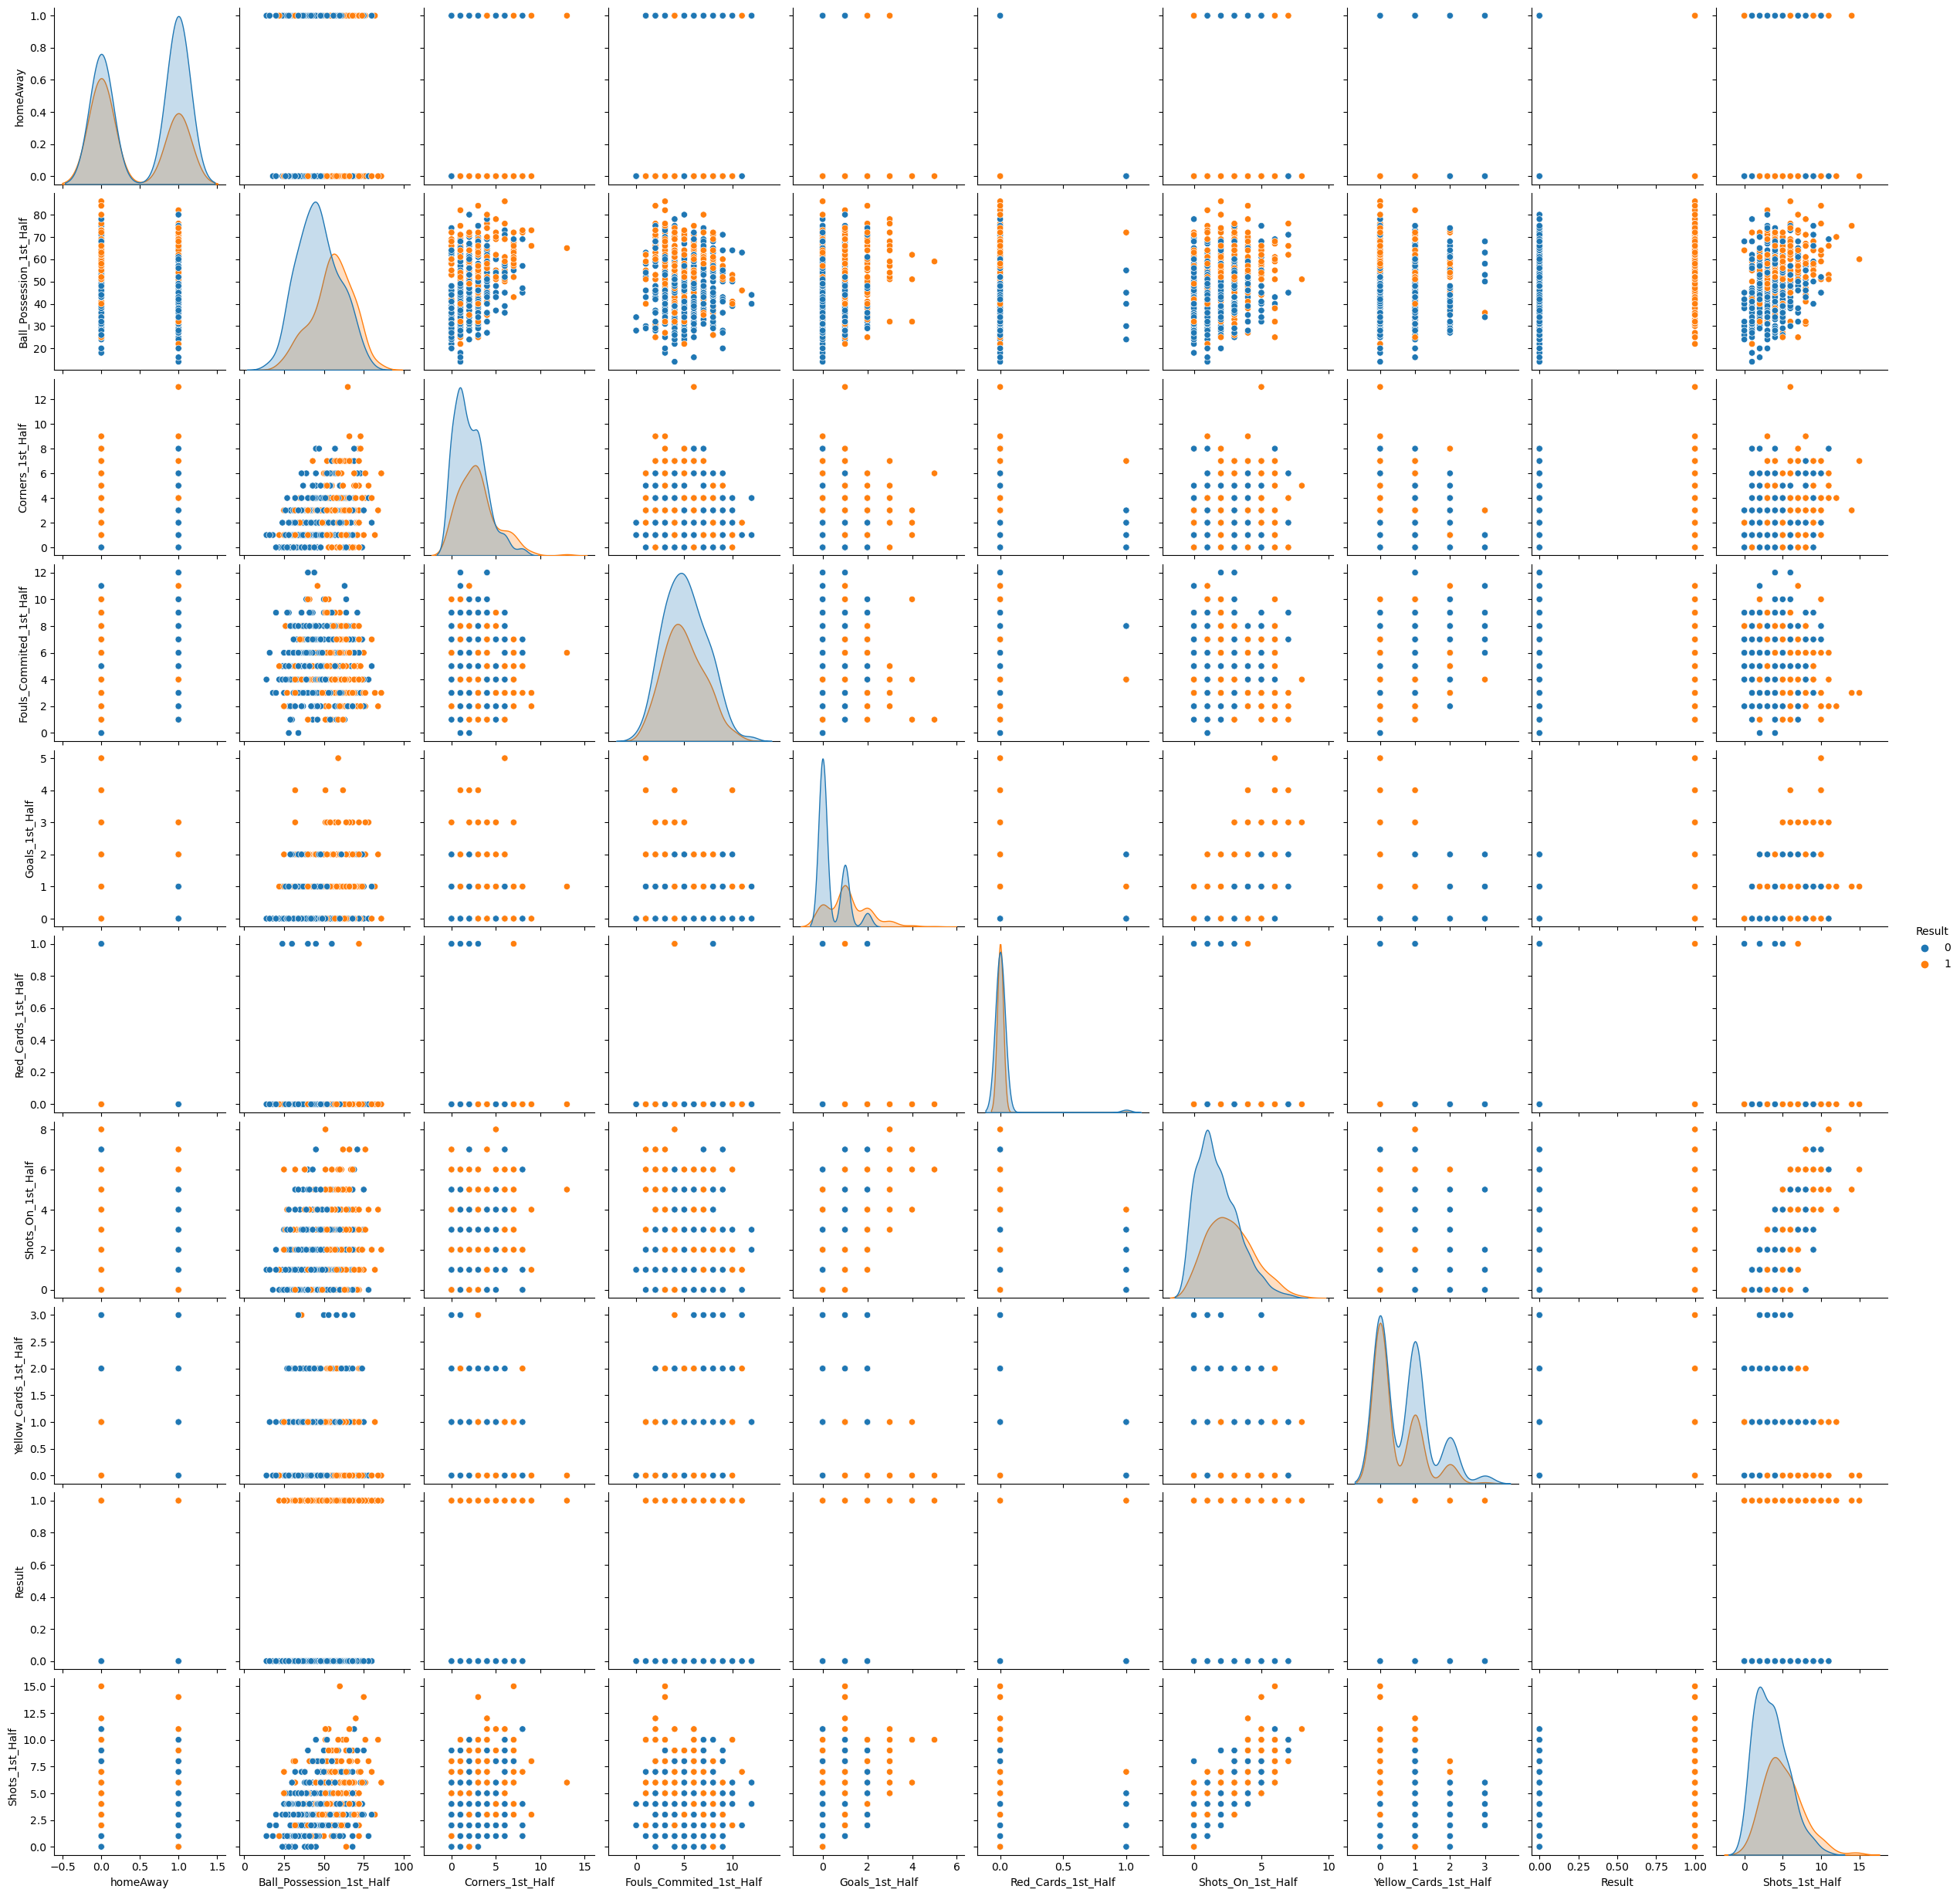

In [51]:
#전반전 경기 내용
input_data = data
input_data2 = data.drop(columns=['Result'], axis=1)
#경기 결과를 수치로 나타낸 것(0: L, 1 : W, 2 : D)
target_data = data['Result']
features_names = ['homeAway', 'Ball_Possession_1st_Half','Corners_1st_Half','Fouls_Commited_1st_Half','Goals_1st_Half','Red_Cards_1st_Half','Shots_On_1st_Half','Yellow_Cards_1st_Half','Result','Shots_1st_Half']
half_df = pd.DataFrame(input_data, columns=features_names)

#데이터 개괄적 특징 파악
sns.pairplot(half_df, hue='Result', vars=features_names)
plt.show()

In [42]:
X = input_data2
y = target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
lr_soccer_half = LogisticRegression(max_iter=5000) # 로지스틱 회귀 모형 생성
lr_soccer_half.fit(X_train, y_train) # 로지스틱 회귀 모형 훈련

LogisticRegression(max_iter=5000)

In [59]:
Y_predict = lr_soccer_half.predict(X_test)

In [60]:
lr_soccer_half.coef_

array([[-0.3996765 ,  0.03496107,  0.18518706,  0.06458148,  1.38484492,
        -0.66265159, -0.09137106, -0.45279392,  0.04229263]])

In [61]:
lr_soccer_half.intercept_

array([-3.4199065])

In [62]:
#회귀모형 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [64]:
# 오차행렬 확인(예측치와 실제값 비교)
confusion_matrix(y_test, Y_predict)

array([[86, 15],
       [20, 38]], dtype=int64)

In [66]:
accuracy = accuracy_score(y_test, Y_predict)
precision = precision_score(y_test, Y_predict)
recall = recall_score(y_test, Y_predict)
f1 = f1_score(y_test, Y_predict)

In [67]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(accuracy, precision, recall, f1))

정확도: 0.780, 정밀도: 0.717, 재현율: 0.655, F1: 0.685
